In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv(path)

In [3]:
data.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [5]:
data['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [6]:
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [10]:
label_encoder = LabelEncoder()

In [11]:
data['Level'] = label_encoder.fit_transform(data['Level'])

In [13]:
#After applying label encoder on level feature "The output"
#We have 0 as low level of cancer disease
# 1 as medium level of cancer disease
# 2 as high level of cancer disease

In [12]:
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,2
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,0
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,0
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,0
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,0
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,0
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,0


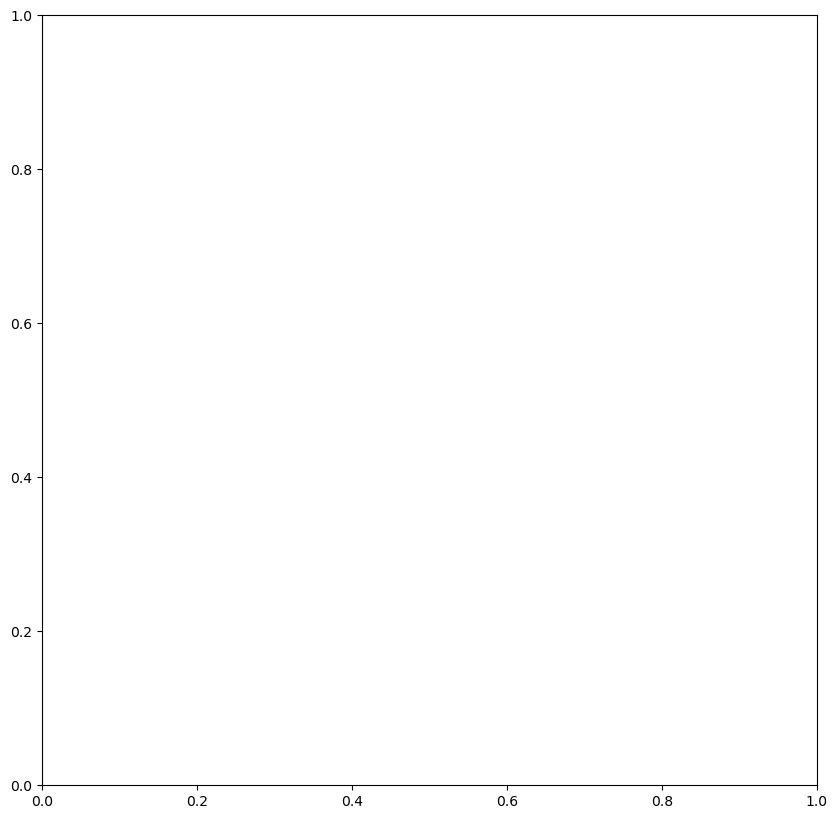

In [23]:
ax = plt.subplots(figsize=(10,10))

C:\Users\hassa\AppData\Local\Temp\ipykernel_816\2937270840.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(data.corr(),cmap = 'crest',annot = True, )


[Text(0.5, 146.7222222222222, '32'), Text(170.72222222222223, 0.5, '32')]

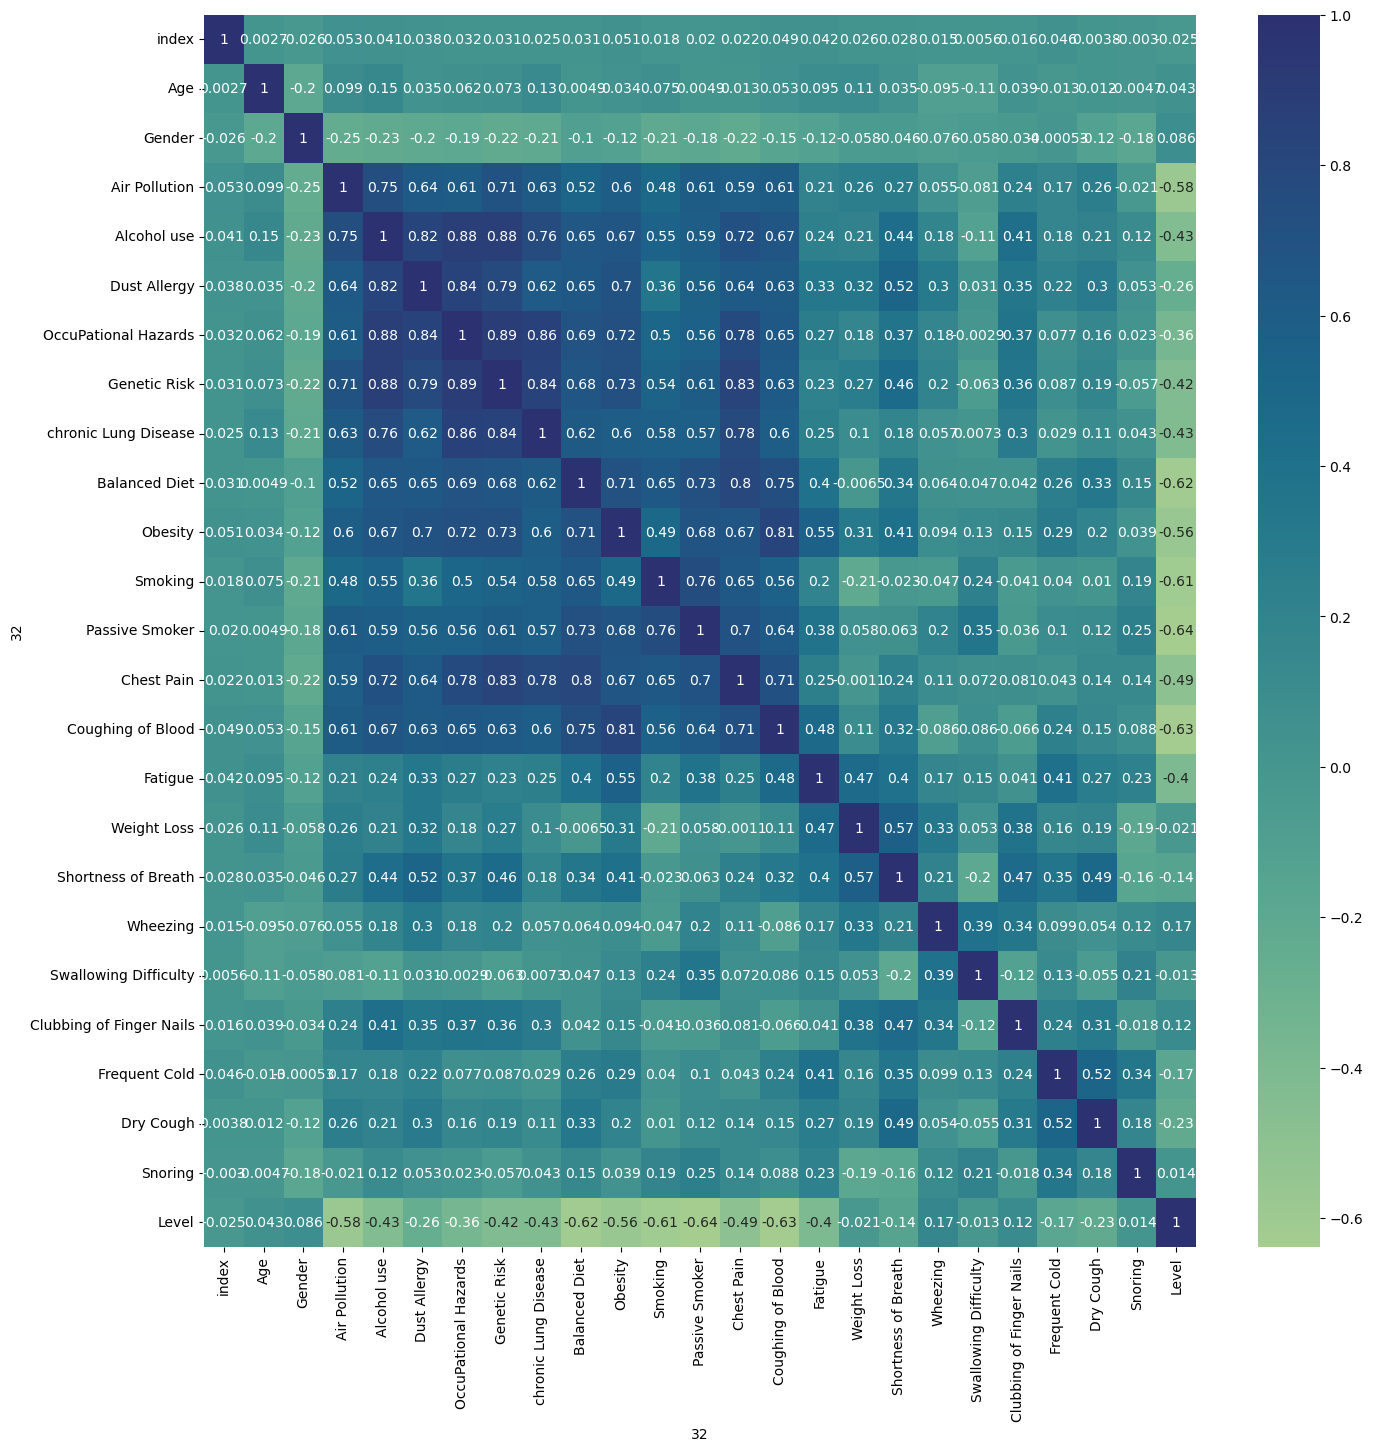

In [34]:
plt.figure(figsize =(16,16))
dataplot = sb.heatmap(data.corr(),cmap = 'crest',annot = True, )
dataplot.set(xlabel='32',ylabel='32')


In [36]:
#the correlation heatmap shows that the gender and Age feature have barely no affection on the level of cancer
#so it's better to drop the column

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [40]:
x = data.drop('Level', axis = 1)

In [51]:
x= x.drop('index', axis = 1)

In [52]:
x = x.drop('Patient Id', axis = 1)

In [53]:
x = x.drop('Gender', axis = 1)

In [54]:
x = x.drop('Age', axis  = 1)

In [55]:
x

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,2,4,5,4,3,2,2,4,3,2,...,4,3,4,2,2,3,1,2,3,4
1,3,1,5,3,4,2,2,2,2,4,...,3,1,3,7,8,6,2,1,7,2
2,4,5,6,5,5,4,6,7,2,3,...,8,8,7,9,2,1,4,6,7,2
3,7,7,7,7,6,7,7,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,6,8,7,7,7,6,7,7,8,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,7,7,7,7,6,7,7,7,8,...,7,5,3,2,7,8,2,4,5,3
996,6,8,7,7,7,6,7,7,7,8,...,7,9,6,5,7,2,4,3,1,4
997,4,5,6,5,5,4,6,7,2,3,...,8,8,7,9,2,1,4,6,7,2
998,6,8,7,7,7,6,7,7,8,7,...,9,3,2,4,1,4,2,4,2,3


In [42]:
y = data['Level']

In [43]:
y

0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Level, Length: 1000, dtype: int32

In [38]:
#the data types are all integers now and ready to be moduled into classification model

In [44]:
#Now we will split the data into train part and test part

In [56]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2)

In [70]:
The_Model = RandomForestRegressor()

In [71]:
The_Model.fit(x_train , y_train)

RandomForestRegressor()

In [72]:
The_Model.score(x_test , y_test)

0.9999938452069549